In [1]:
#D.S Imports
import pandas as pd
import numpy as np
#Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
#Statistics
from scipy import stats
import statsmodels.api as sm
from statsmodels.graphics.mosaicplot import mosaic
#Scikit-Learn
import sklearn
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
#Ignore Warning
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Import main dataset
df = pd.read_csv('churn_clean.csv')

In [5]:
#display data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CaseOrder             10000 non-null  int64  
 1   Customer_id           10000 non-null  object 
 2   Interaction           10000 non-null  object 
 3   UID                   10000 non-null  object 
 4   City                  10000 non-null  object 
 5   State                 10000 non-null  object 
 6   County                10000 non-null  object 
 7   Zip                   10000 non-null  int64  
 8   Lat                   10000 non-null  float64
 9   Lng                   10000 non-null  float64
 10  Population            10000 non-null  int64  
 11  Area                  10000 non-null  object 
 12  TimeZone              10000 non-null  object 
 13  Job                   10000 non-null  object 
 14  Children              10000 non-null  int64  
 15  Age                 

In [7]:
#check for null values
if df.isnull().sum().sum() ==0:
    print("No null values found.")
else:
    print("Null values found.")

Null values found.


In [9]:
#check for duplicates
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Length: 10000, dtype: bool

In [11]:
#cleaning our dataset
#Step 1 rename columns
col_head = {'CaseOrder': 'case_order',
    'Customer_id': 'customer_id',
    'Interaction': 'interaction',
    'City': 'city',
    'State': 'state',
    'County': 'county',
    'Zip': 'zip',
    'Lat': 'lat',
    'Lng': 'lng',
    'Population': 'population',  
    'Area': 'area',  
    'Job': 'job',
    'Children': 'children',
    'Age': 'age', 
    'Income': 'income',  
    'Marital': 'marital_type',
    'Gender': 'gender',
    'Churn': 'churn',
    'Outage_sec_perweek': 'outage_sec_perweek',
    'Email': 'email',
    'Contacts': 'contacts',
    'Yearly_equip_failure': 'Yearly_equip_failure',
    'Techie': 'techie',
    'Contract': 'contract',
    'Port_modem': 'port_modem',
    'Tablet': 'tablet',
    'InternetService': 'internet_service',
    'Phone': 'phone',
    'Multiple': 'multiple_lines',
    'OnlineSecurity': 'online_security',
    'OnlineBackup': 'online_backup',
    'DeviceProtection': 'device_protection',
    'TechSupport': 'tech_support',
    'StreamingTV': 'streaming_tv',
    'StreamingMovies': 'streaming_movies',
    'PaperlessBilling': 'paperless_billing',
    'PaymentMethod': 'payment_method',
    'Tenure': 'tenure',
    'MonthlyCharge': 'MonthlyCharge',
    'Bandwidth_GB_Year': 'Bandwidth_GB_Year',
    'Item1': 'timely_response',
    'Item2': 'timely_fixes',
    'Item3': 'timely_replacements',
    'Item4': 'reliability',
    'Item5': 'options',
    'Item6': 'respectful_response',
    'Item7': 'courteous_exchange',
    'Item8': 'active_listening'}
df.rename(columns=col_head, inplace=True)

In [15]:
#print columns to confirm change
df.columns

Index(['case_order', 'customer_id', 'interaction', 'UID', 'city', 'state',
       'county', 'zip', 'lat', 'lng', 'population', 'area', 'TimeZone', 'job',
       'children', 'age', 'income', 'marital_type', 'gender', 'churn',
       'outage_sec_perweek', 'email', 'contacts', 'Yearly_equip_failure',
       'techie', 'contract', 'port_modem', 'tablet', 'internet_service',
       'phone', 'multiple_lines', 'online_security', 'online_backup',
       'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies',
       'paperless_billing', 'payment_method', 'tenure', 'MonthlyCharge',
       'Bandwidth_GB_Year', 'timely_response', 'timely_fixes',
       'timely_replacements', 'reliability', 'options', 'respectful_response',
       'courteous_exchange', 'active_listening'],
      dtype='object')

array([[<Axes: title={'center': 'case_order'}>,
        <Axes: title={'center': 'zip'}>, <Axes: title={'center': 'lat'}>,
        <Axes: title={'center': 'lng'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'children'}>,
        <Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'income'}>,
        <Axes: title={'center': 'outage_sec_perweek'}>,
        <Axes: title={'center': 'email'}>],
       [<Axes: title={'center': 'contacts'}>,
        <Axes: title={'center': 'Yearly_equip_failure'}>,
        <Axes: title={'center': 'tenure'}>,
        <Axes: title={'center': 'MonthlyCharge'}>,
        <Axes: title={'center': 'Bandwidth_GB_Year'}>],
       [<Axes: title={'center': 'timely_response'}>,
        <Axes: title={'center': 'timely_fixes'}>,
        <Axes: title={'center': 'timely_replacements'}>,
        <Axes: title={'center': 'reliability'}>,
        <Axes: title={'center': 'options'}>],
       [<Axes: title={'center': 'respectful_res

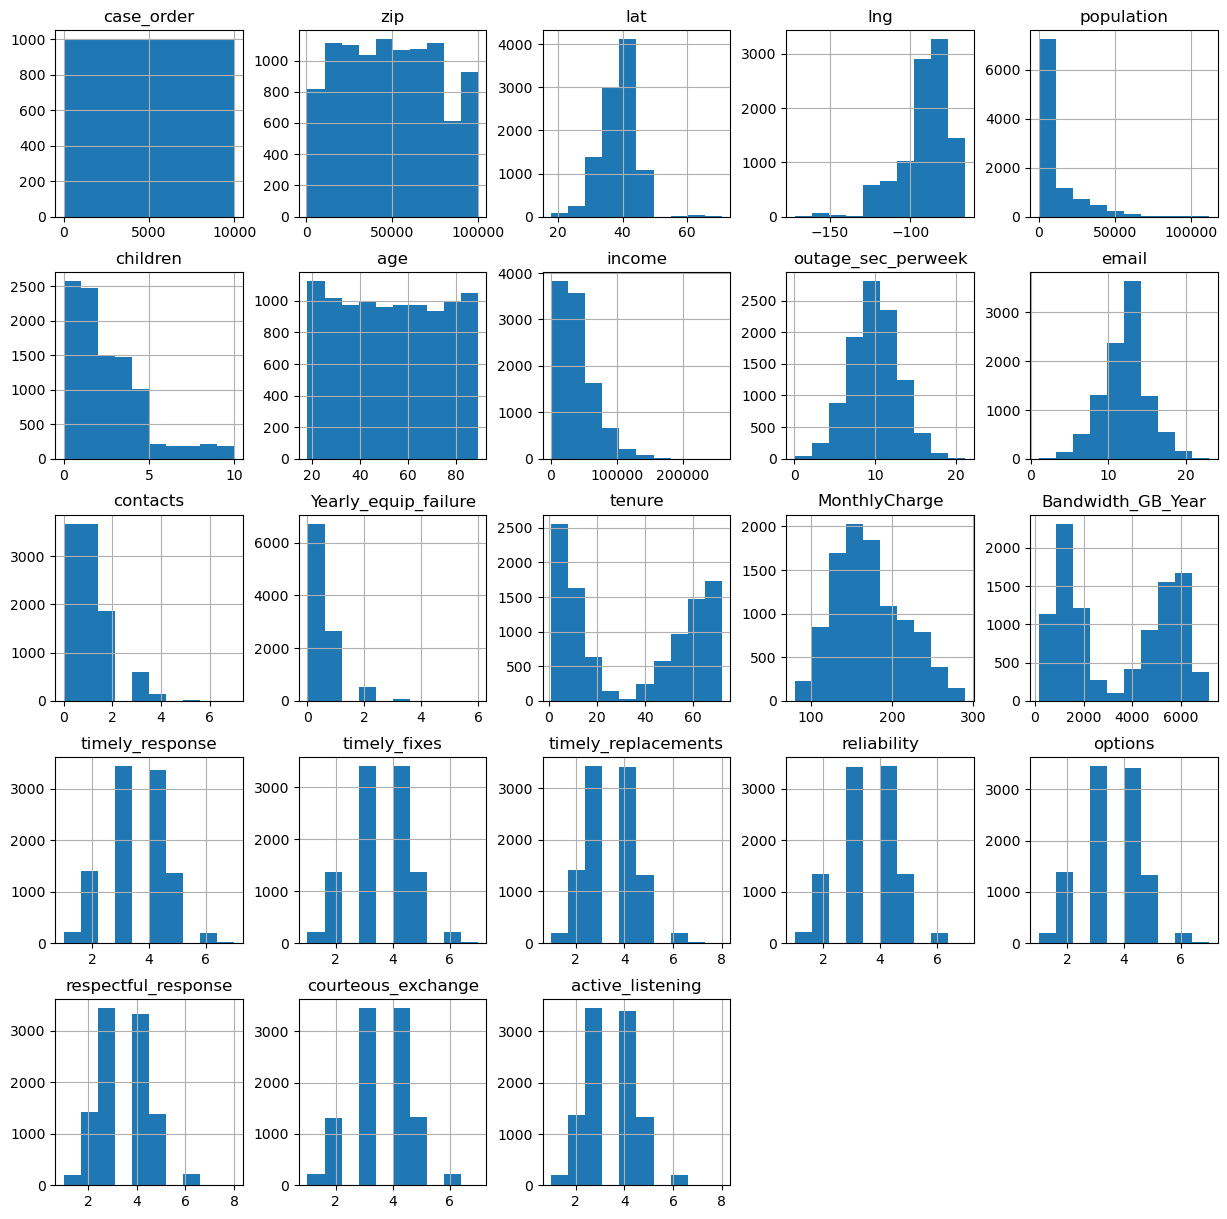

In [17]:
#histogram
df.hist(figsize = (15,15))

In [19]:
#drop less meaningful columns
df = df.drop(columns=['timely_response','timely_fixes','timely_replacements','reliability','options','respectful_response','courteous_exchange','active_listening', 'case_order', 'customer_id', 'interaction', 'UID', 'city', 'state', 'county', 'zip', 'lat', 'lng',
                      'TimeZone', 'job','marital_type', 'contract', 'port_modem', 'tablet', 'internet_service', 'phone', 'multiple_lines',
                      'online_security', 'online_backup', 'area','device_protection', 'streaming_tv', 'streaming_movies', 'paperless_billing',
                      'payment_method'])

In [21]:
#confirm changes
df.head()

,population,children,age,income,gender,churn,outage_sec_perweek,email,contacts,Yearly_equip_failure,techie,tech_support,tenure,MonthlyCharge,Bandwidth_GB_Year
0,38,0,68,28561.99,Male,No,7.978323,10,0,1,No,No,6.795513,172.455519,904.536110
1,10446,1,27,21704.77,Female,Yes,11.699080,12,0,1,Yes,No,1.156681,242.632554,800.982766
2,3735,4,50,9609.57,Female,No,10.752800,9,0,1,Yes,No,15.754144,159.947583,2054.706961
3,13863,1,48,18925.23,Male,No,14.913540,15,2,0,Yes,No,17.087227,119.956840,2164.579412
4,11352,0,83,40074.19,Male,Yes,8.147417,16,2,1,No,Yes,1.670972,149.948316,271.493436


In [23]:
#show statistical information of continuous variables
df.describe()

,population,children,age,income,outage_sec_perweek,email,contacts,Yearly_equip_failure,tenure,MonthlyCharge,Bandwidth_GB_Year
count,10000.000000,10000.0000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,9756.562400,2.0877,53.078400,39806.926771,10.001848,12.016000,0.994200,0.398000,34.526188,172.624816,3392.341550
std,14432.698671,2.1472,20.698882,28199.916702,2.976019,3.025898,0.988466,0.635953,26.443063,42.943094,2185.294852
min,0.000000,0.0000,18.000000,348.670000,0.099747,1.000000,0.000000,0.000000,1.000259,79.978860,155.506715
25%,738.000000,0.0000,35.000000,19224.717500,8.018214,10.000000,0.000000,0.000000,7.917694,139.979239,1236.470827
50%,2910.500000,1.0000,53.000000,33170.605000,10.018560,12.000000,1.000000,0.000000,35.430507,167.484700,3279.536903
75%,13168.000000,3.0000,71.000000,53246.170000,11.969485,14.000000,2.000000,1.000000,61.479795,200.734725,5586.141370
max,111850.000000,10.0000,89.000000,258900.700000,21.207230,23.000000,7.000000,6.000000,71.999280,290.160419,7158.981530


In [25]:
# calculated the number of unique values
df.nunique()

population               5933
children                   11
age                        72
income                   9993
gender                      3
churn                       2
outage_sec_perweek       9986
email                      23
contacts                    8
Yearly_equip_failure        6
techie                      2
tech_support                2
tenure                   9996
MonthlyCharge             750
Bandwidth_GB_Year       10000
dtype: int64

In [27]:
#counted number of unique values
df.value_counts()

population  children  age  income    gender  churn  outage_sec_perweek  email  contacts  Yearly_equip_failure  techie  tech_support  tenure     MonthlyCharge  Bandwidth_GB_Year
0           0         25   21951.91  Male    Yes    7.554437            18     0         0                     No      Yes           12.128230  194.974400     1464.752497          1
7626        3         37   35801.05  Male    Yes    11.049080           12     0         0                     No      Yes           3.046588   204.949600     793.320730           1
7594        1         63   63719.51  Male    Yes    10.987420           14     0         0                     No      No            45.752970  277.651300     4563.265438          1
7602        0         35   56315.69  Female  Yes    9.020485            15     1         0                     No      No            4.768185   139.934900     1138.754327          1
7611        4         23   44462.77  Female  No     13.033990           10     1         0     

In [29]:
#drop highly correlated variables
df = df.drop('Bandwidth_GB_Year', axis=1)

In [31]:
#create dummy variables in order to encode categorical 
df['DummyChurn'] = [1 if v=='Yes' else 0 for v in df['churn']]
df['DummyMale'] = [1 if v=='Male' else 0 for v in df['gender']]
df['DummyFemale'] = [1 if v=='Female' else 0 for v in df['gender']]
df['DummyNonbinary'] = [1 if v=='Nonbinary' else 0 for v in df['gender']]
df['DummyTechie'] = [1 if v=='Yes' else 0 for v in df['techie']]
df['DummyTechSupport'] = [1 if v=='Yes' else 0 for v in df['tech_support']]

#drop original categorical features
df = df.drop(columns=['churn', 'gender', 'techie', 'tech_support'])


In [33]:
#confirm changes
df.head()

,population,children,age,income,outage_sec_perweek,email,contacts,Yearly_equip_failure,tenure,MonthlyCharge,DummyChurn,DummyMale,DummyFemale,DummyNonbinary,DummyTechie,DummyTechSupport
0,38,0,68,28561.99,7.978323,10,0,1,6.795513,172.455519,0,1,0,0,0,0
1,10446,1,27,21704.77,11.699080,12,0,1,1.156681,242.632554,1,0,1,0,1,0
2,3735,4,50,9609.57,10.752800,9,0,1,15.754144,159.947583,0,0,1,0,1,0
3,13863,1,48,18925.23,14.913540,15,2,0,17.087227,119.956840,0,1,0,0,1,0
4,11352,0,83,40074.19,8.147417,16,2,1,1.670972,149.948316,1,1,0,0,0,1


In [35]:
#prepared clean dataset
df.to_csv('Prepared_Churn_data')

In [37]:
#assign predictor features
X= df[['population', 'children', 'age', 'income', 'outage_sec_perweek', 'email', 'contacts', 'Yearly_equip_failure', 'tenure', 'MonthlyCharge', 'DummyTechie', 'DummyTechSupport', 'DummyMale', 'DummyFemale', 'DummyNonbinary']]
#assign dependent variable
y=df[['DummyChurn']]

In [39]:
#80/20 split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, test_size = 0.2, random_state = 25)

In [41]:
#save as CSV Files
pd.DataFrame(X_train).to_csv('X_train.csv')
pd.DataFrame(X_test).to_csv('X_test.csv')
pd.DataFrame(y_train).to_csv('y_train.csv')
pd.DataFrame(y_test).to_csv('y_test.csv')

In [43]:
#Define the hyperparameter grid
parameter_grid = {'max_depth': [2,3,4,5],
                  'min_samples_leaf':[1,2,3,4]}
#decision tree classifier
dtc = DecisionTreeClassifier()

#grid search using 5-fold cross-validation
grid_search = GridSearchCV(dtc, parameter_grid, cv=5)

#train the model
grid_search.fit(X_train, y_train)

#predict class labels of the testing data 
y_pred = grid_search.predict(X_test)

#calculate accuracy and AUC of the best model
accuracy = accuracy_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)

In [49]:
#print
print("Accuracy:", accuracy)
print("AUC:", auc)
print("Best Hyperparameters:", grid_search.best_params_)

Accuracy: 0.8335
AUC: 0.745357713002954
Best Hyperparameters: {'max_depth': 3, 'min_samples_leaf': 2}


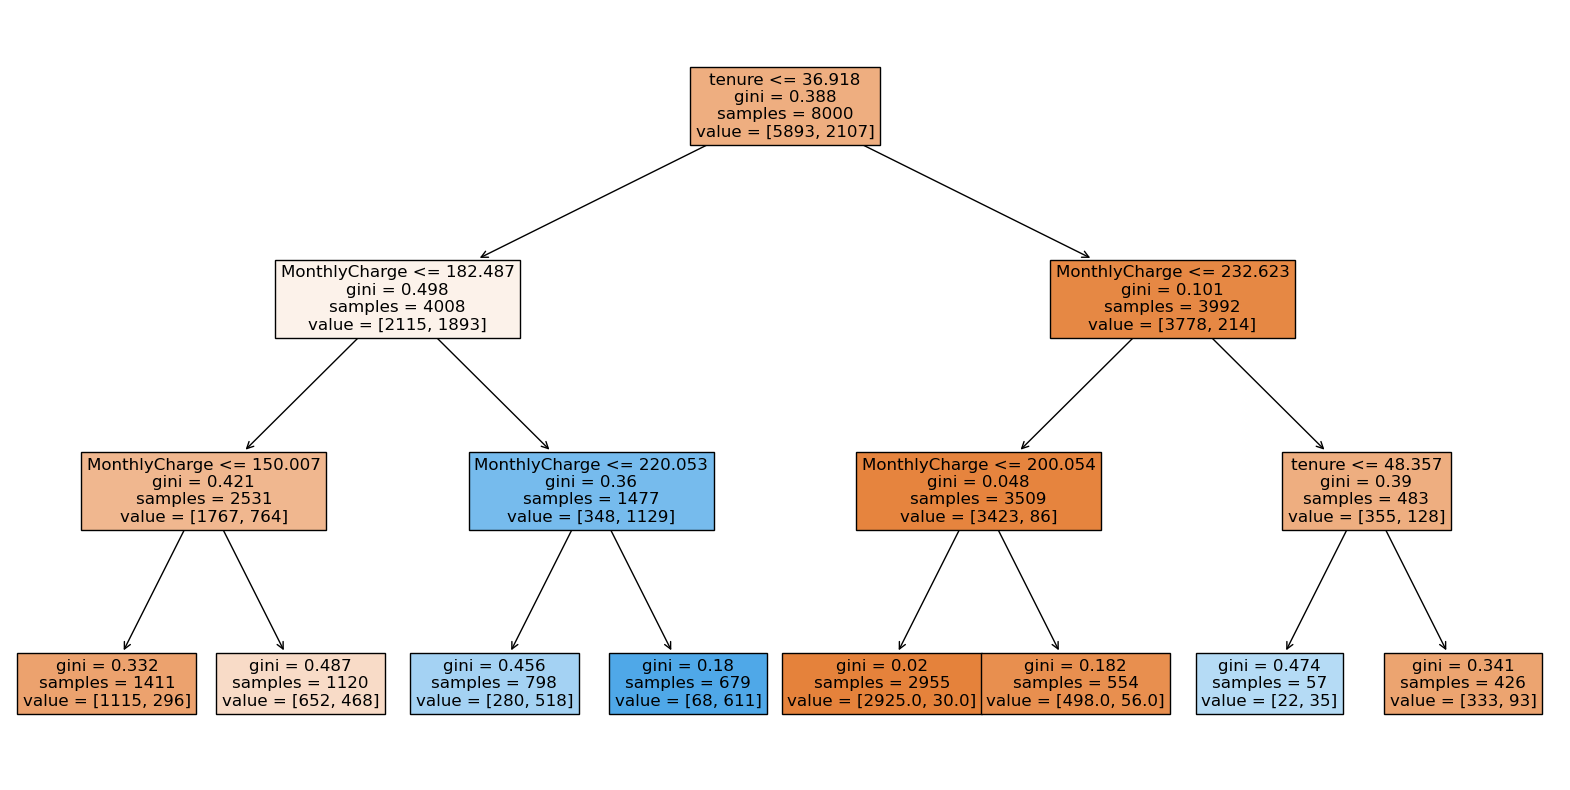

In [51]:
#fit the decision tree with the found parameters
dt = DecisionTreeClassifier(max_depth = 3, min_samples_leaf = 2)
dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)

#plot 
plt.figure(figsize=(20,10))
plot_tree(grid_search.best_estimator_,filled=True, fontsize=12, feature_names=X.columns)
plt.show()

In [53]:
#classification Report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.94      0.89      1457
           1       0.77      0.55      0.64       543

    accuracy                           0.83      2000
   macro avg       0.81      0.75      0.77      2000
weighted avg       0.83      0.83      0.82      2000



In [55]:
#confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

[[1367   90]
 [ 243  300]]


Text(0.5, 23.52222222222222, 'Predicted')

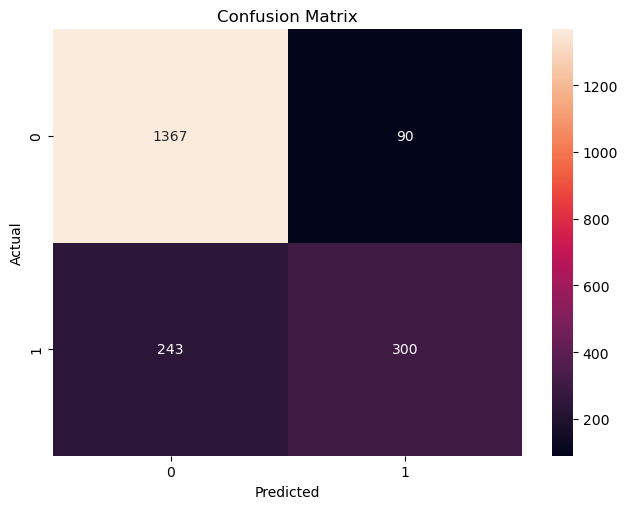

In [57]:
#heatmap to visualize confusion matrix
sns.heatmap(pd.DataFrame(conf_matrix), annot = True, fmt = 'g')
plt.tight_layout()
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')

In [59]:
# Predict class labels of the training and testing data 
y_train_pred = grid_search.predict(X_train)
y_test_pred = grid_search.predict(X_test)

# Calculate accuracy of the best model on the training and testing data
accuracy_train = accuracy_score(y_train, y_train_pred)
accuracy_test = accuracy_score(y_test, y_test_pred)

# Print 
print("Training set accuracy:", accuracy_train)
print("Test set accuracy:", accuracy_test)

Training set accuracy: 0.835875
Test set accuracy: 0.8335


In [61]:
#AUC-ROC Score
AUC_ROC = roc_auc_score(y_test, y_pred)
print("AUC_ROC Score:", AUC_ROC)

AUC_ROC Score: 0.745357713002954


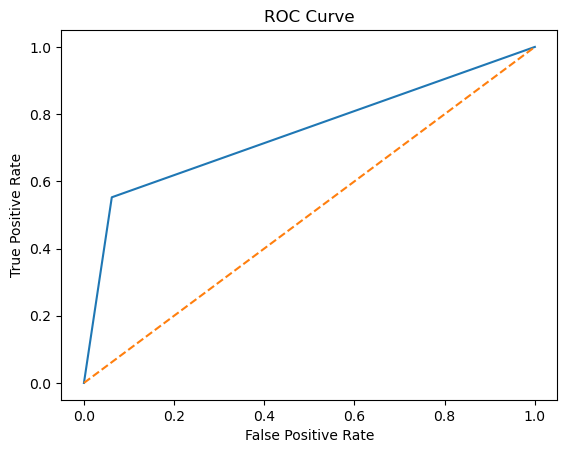

In [63]:
#ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle = '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [65]:
#MSE 
mse_dt = mean_squared_error(y_test, y_pred)

#RMSE
rmse_dt = mse_dt**(1/2)

In [67]:
#print
print("Accuracy:", dt.score(X_test, y_test))
print("Mean Squared Error:", mse_dt)
print("Root Mean Squared Error: ", rmse_dt)

Accuracy: 0.8335
Mean Squared Error: 0.1665
Root Mean Squared Error:  0.4080441152620633
